In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('future.no_silent_downcasting', True)

In [3]:
df = pd.read_csv('../data/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.drop(columns=['id','dataset'], inplace=True)

In [7]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df.fillna({'trestbps': df['trestbps'].mean()}, inplace=True)
df.fillna({'chol': df['chol'].mean()}, inplace=True)
df.fillna({'thalch': df['thalch'].mean()}, inplace=True)
df.fillna({'oldpeak': df['oldpeak'].mean()}, inplace=True)
df.fillna({'ca': df['ca'].mean()}, inplace=True)

df.fillna({'fbs': df['fbs'].mode()[0]}, inplace=True)
df.fillna({'restecg': df['restecg'].mode()[0]}, inplace=True)
df.fillna({'exang': df['exang'].mode()[0]}, inplace=True)
df.fillna({'slope': df['slope'].mode()[0]}, inplace=True)
df.fillna({'thal': df['thal'].mode()[0]}, inplace=True)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})


df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [11]:
x = df.drop(columns=['num'])
y = df['num']

In [12]:
y = y.apply(lambda v: 0 if v == 0 else 1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((736, 18), (736,), (184, 18), (184,))

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 640 to 317
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       736 non-null    int64  
 1   sex                       736 non-null    int64  
 2   trestbps                  736 non-null    float64
 3   chol                      736 non-null    float64
 4   fbs                       736 non-null    int64  
 5   thalch                    736 non-null    float64
 6   exang                     736 non-null    int64  
 7   oldpeak                   736 non-null    float64
 8   ca                        736 non-null    float64
 9   cp_atypical angina        736 non-null    bool   
 10  cp_non-anginal            736 non-null    bool   
 11  cp_typical angina         736 non-null    bool   
 12  restecg_normal            736 non-null    bool   
 13  restecg_st-t abnormality  736 non-null    bool   
 14  slope_flat   

In [16]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)


best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

from sklearn.metrics import classification_report
print("Best Accuracy:", best_rf.score(x_test, y_test))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Accuracy: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.86      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



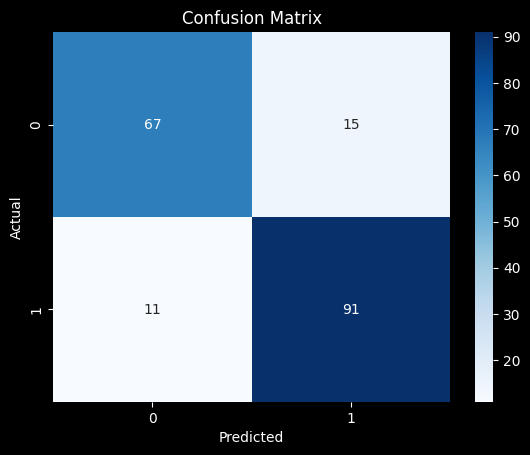

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
